# Visualise and Explore Data 

In [1]:
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import iqr
import seaborn as sns

Load dataframes

In [2]:
data_location = '..//ratboxData//ratbox100_hexssp_x10.csv'
df_hex100 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox50_hexssp_x10.csv'
df_hex50 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox100_discrete6_x10.csv'
df_discrete6100 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox50_discrete6_x10.csv'
df_discrete650 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox100_discrete8_x10.csv'
df_discrete8100 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox50_discrete8_x10.csv'
df_discrete850 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox100_discrete10_x10.csv'
df_discrete10100 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox50_discrete10_x10.csv'
df_discrete1050 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox100_discrete12_x10.csv'
df_discrete12100 = pd.read_csv(data_location)

data_location = '..//ratboxData//ratbox50_discrete12_x10.csv'
df_discrete1250 = pd.read_csv(data_location)

Convert relevant data from string to array inside dataframes

In [3]:
DATAFRAMES = [df_hex100, df_hex50, df_discrete6100, df_discrete650, df_discrete8100, 
             df_discrete850, df_discrete10100, df_discrete1050, df_discrete12100,
             df_discrete1250]

for df in DATAFRAMES:
    for i in range(10):
        str_array = df['roll_mean'][i].replace("]", "")
        str_array = str_array.replace("[", "")
        str_array = str_array.replace("\n", " ")
        df['roll_mean'][i] = np.fromstring(str_array, sep=' ')
        
        str_array = df['episodes'][i].replace('\n', "")
        str_array = str_array.replace('[', "")
        str_array = str_array.replace(']', "")
        df['episodes'][i] = np.fromstring(str_array, sep=' ')

/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roll_mean'][i] = np.fromstring(str_array, sep=' ')
/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episodes'][i] = np.fromstring(str_array, sep=' ')
/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roll_mean'][i] = np.fromstring(str_array, sep=' ')
/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episodes'][i] = np.fromstring(str_array, sep=' ')
/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['episodes'][i] = np.fromstring(str_array, sep=' ')
/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['roll_mean'][i] = np.fromstring(str_array, sep=' ')
/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/728743250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

Set formatting values

In [4]:
axisLabelSize=16
titleSize=20
tickSize=14
legendtitleSize=14
legendSize=12

COLORS = ['#ffdcc0', '#eaef98', '#97e074', '#54d078', '#37c1b4', '#1e64b1',
          '#1e08a2', '#6e0092', '#820052', '#730002']

## Compare Performance with HexSSP vs Discrete Representation

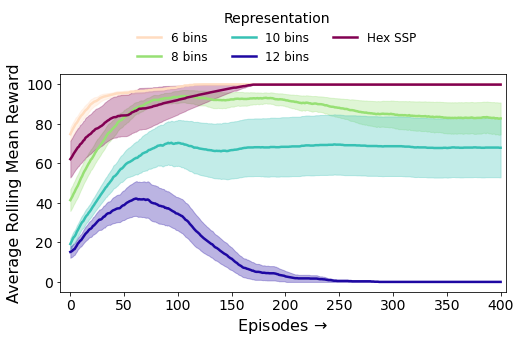

In [5]:
mean_rollmean_discrete6100 = np.vstack(df_discrete6100['roll_mean'])[:,99:].mean(axis=0)
x = np.vstack(df_discrete6100['roll_mean'])[:,99:]
sem_discrete6100 = stats.sem(x, axis=0)

mean_rollmean_discrete8100 = np.vstack(df_discrete8100['roll_mean'])[:,99:].mean(axis=0)
x = np.vstack(df_discrete8100['roll_mean'])[:,99:]
sem_discrete8100 = stats.sem(x, axis=0)

mean_rollmean_discrete10100 = np.vstack(df_discrete10100['roll_mean'])[:,99:].mean(axis=0)
x = np.vstack(df_discrete10100['roll_mean'])[:,99:]
sem_discrete10100 = stats.sem(x, axis=0)

mean_rollmean_discrete12100 = np.vstack(df_discrete12100['roll_mean'])[:,99:].mean(axis=0)
x = np.vstack(df_discrete12100['roll_mean'])[:,99:]
sem_discrete12100 = stats.sem(x, axis=0)

mean_rollmean_hex100 = np.vstack(df_hex100['roll_mean'])[:,99:].mean(axis=0)
x = np.vstack(df_hex100['roll_mean'])[:,99:]
sem_hex100 = stats.sem(x, axis=0)

fig = plt.figure(figsize=(8,4))

plt.plot(mean_rollmean_discrete6100, label='6 bins', color=COLORS[0], linewidth=2.5)
plt.fill_between(np.arange(0,401), mean_rollmean_discrete6100-sem_discrete6100, 
                 mean_rollmean_discrete6100+sem_discrete6100, alpha=0.3, color=COLORS[0])
plt.plot(mean_rollmean_discrete8100, label='8 bins', color=COLORS[2], linewidth=2.5)
plt.fill_between(np.arange(0,401), mean_rollmean_discrete8100-sem_discrete8100, 
                 mean_rollmean_discrete8100+sem_discrete8100, alpha=0.3, color=COLORS[2])
plt.plot(mean_rollmean_discrete10100, label='10 bins', color=COLORS[4], linewidth=2.5)
plt.fill_between(np.arange(0,401), mean_rollmean_discrete10100-sem_discrete10100, 
                 mean_rollmean_discrete10100+sem_discrete10100, alpha=0.3, color=COLORS[4])
plt.plot(mean_rollmean_discrete12100, label='12 bins', color=COLORS[6], linewidth=2.5)
plt.fill_between(np.arange(0,401), mean_rollmean_discrete12100-sem_discrete12100, 
                 mean_rollmean_discrete12100+sem_discrete12100, alpha=0.3, color=COLORS[6])
plt.plot(mean_rollmean_hex100, label='Hex SSP', color=COLORS[8], linewidth=2.5)
plt.fill_between(np.arange(0,401), mean_rollmean_hex100-sem_hex100, 
                 mean_rollmean_hex100+sem_hex100, alpha=0.3, color=COLORS[8])

plt.ylabel('Average Rolling Mean Reward', fontsize=axisLabelSize)
plt.xlabel(r'Episodes $\to$', fontsize=axisLabelSize)
plt.tick_params(labelsize=tickSize)

plt.legend(bbox_to_anchor=(0.15, 1.0),title='Representation', title_fontsize=legendtitleSize, 
           fontsize=legendSize, ncol=3, frameon=False,)

plt.xlim(-10, 405)

fig.savefig("..\\figures\\rolling_rew.pdf", bbox_inches="tight")

## Explore How Changing the Agent's Speed Affected Performance

Create combined dataframes for each speed condition

In [6]:
term_rew =[np.vstack(df_discrete6100['episodes']).T[-1], 
           np.vstack(df_discrete8100['episodes']).T[-1], np.vstack(df_discrete10100['episodes']).T[-1], 
           np.vstack(df_discrete12100['episodes']).T[-1],
           np.vstack(df_discrete650['episodes']).T[-1], 
           np.vstack(df_discrete850['episodes']).T[-1], np.vstack(df_discrete1050['episodes']).T[-1], 
           np.vstack(df_discrete1250['episodes']).T[-1]]

rep = [['6']*10, ['8']*10, ['10']*10, ['12']*10, ['6']*10, ['8']*10, ['10']*10, ['12']*10]
speed = [['10,000']*40, ['5,000']*40]

combined_all = pd.DataFrame({'terminal reward': np.hstack(term_rew),
                            'representation': np.hstack(rep),
                            'pixels per sec': np.hstack(speed)})

Plot the results as a point plot with standard error as error bars

/var/folders/tl/hlp8krpx4gl2hf3fkrsj2qpw0000gr/T/ipykernel_49064/247669634.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=combined_all, x='representation', y='terminal reward', hue="pixels per sec",


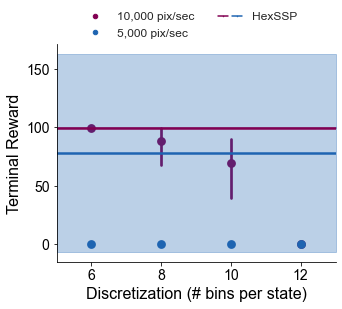

In [7]:
fig, ax1 = plt.subplots(1, 1, figsize=(5,4))

sns.set_style('white')
sns.pointplot(data=combined_all, x='representation', y='terminal reward', hue="pixels per sec", 
              ci=95, palette=[COLORS[8], COLORS[5]], join=False)
sns.despine()

mu_hex100 = np.vstack(df_hex100['episodes']).mean(axis=0)[-1]
sigma_hex100 = np.vstack(df_hex100['episodes']).std(axis=0)[-1]
ci_hex100 = stats.norm.interval(0.95, loc=mu_hex100, scale=sigma_hex100)

mu_hex50 = np.vstack(df_hex50['episodes']).mean(axis=0)[-1]
sigma_hex50 = np.vstack(df_hex50['episodes']).std(axis=0)[-1]
ci_hex50 = stats.norm.interval(0.95, loc=mu_hex50, scale=sigma_hex50)

l1 = ax1.axhline(y=mu_hex100, color=COLORS[8], linestyle='-', linewidth=2.5)
plt.fill_between(np.arange(-.5,4.5), ci_hex100[0], ci_hex100[1], alpha=0.3, color=COLORS[8])

l2 = ax1.axhline(y=mu_hex50, color=COLORS[5], linestyle='-', linewidth=2.5)
plt.fill_between(np.arange(-.5,4.5), ci_hex50[0], ci_hex50[1], alpha=0.3, color=COLORS[5])

ax1.set_ylabel('Terminal Reward', fontsize=axisLabelSize)
ax1.set_xlabel('Discretization (# bins per state)', fontsize=axisLabelSize)

ax1.tick_params(labelsize=tickSize)

m1 = mlines.Line2D([], [], color=COLORS[8], marker='.', linestyle='None',
                          markersize=9, label='10,000 pix/sec')
m2 = mlines.Line2D([], [], color=COLORS[5], marker='.', linestyle='None',
                          markersize=9, label='5,000 pix/sec')
l1 = mlines.Line2D([], [], color=COLORS[8], marker='.', linestyle='-',
                          markersize=1, label='HexSSP')
l2 = mlines.Line2D([], [], color=COLORS[5], marker='.', linestyle='-',
                          markersize=1, label='HexSSP')

plt.legend(handles=[m1, m2, (l1,l2)], labels=['10,000 pix/sec', '5,000 pix/sec', 'HexSSP'], 
          fontsize=legendSize, handler_map={tuple: HandlerTuple(ndivide=None)},
          bbox_to_anchor=(0.9, 1.2), ncol=2, frameon=False,)

plt.xlim(-0.5, 3.5)

#fig.savefig(".\\speed_ci.pdf", bbox_inches="tight")
plt.show()

Plot the reward gained at the end of each learning trial for each random seed of the experiments using hexSSPs where the speed was reduced to 50,000pps

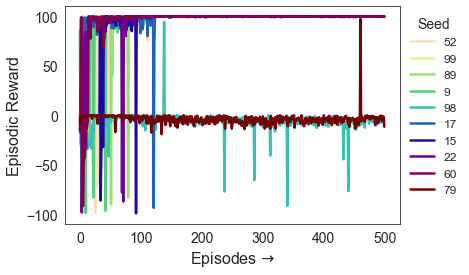

In [8]:
fig = plt.figure(figsize=(6,4))

for i in range(len(df_hex50)):
    plt.plot(df_hex50['episodes'][i], label=df_hex50['seed'][i], linewidth=2.5, color=COLORS[i])
    
plt.ylabel('Episodic Reward', fontsize=axisLabelSize)
plt.xlabel(r'Episodes $\to$', fontsize=axisLabelSize)
plt.tick_params(labelsize=tickSize)
    
plt.legend(bbox_to_anchor=(1.0, 1.0),title='Seed', title_fontsize=legendtitleSize, 
           fontsize=legendSize, ncol=1, frameon=False,)

#fig.savefig(".\\hex50_episodicrew.pdf", bbox_inches="tight")

Plot the rolling mean reward for each random seed of the experiments using hexSSPs where the speed was reduced to 50,000pps

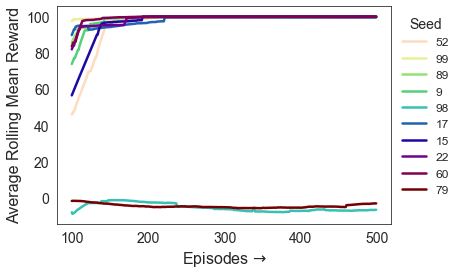

In [9]:
fig = plt.figure(figsize=(6,4))

for i in range(len(df_hex50)):
    plt.plot(df_hex50['roll_mean'][i], label=df_hex50['seed'][i], linewidth=2.5, color=COLORS[i])
    
plt.ylabel('Average Rolling Mean Reward', fontsize=axisLabelSize)
plt.xlabel(r'Episodes $\to$', fontsize=axisLabelSize)
plt.tick_params(labelsize=tickSize)
    
plt.legend(bbox_to_anchor=(1.0, 1.0),title='Seed', title_fontsize=legendtitleSize, 
           fontsize=legendSize, ncol=1, frameon=False,)

#fig.savefig(".\\hex50_rollingrew.pdf", bbox_inches="tight")